In [134]:
import pandas as pd
import re
import numpy as np
# import matplotlib
import matplotlib.pyplot as plt
# from matplotlib.pyplot import figure
import seaborn as sns
import copy
from pathlib import Path

In [135]:
# Define constants
INPUT_PATH = "./jobs/"
OUTPUT_PATH = "./transformed/"

In [136]:
# Set the max no. of rows displayed to unlimited (useful when looking at the full dataframe)
pd.set_option('display.max_rows', None)

# Display matplotlib figures inline in Juypter Notebook
%matplotlib inline
# figure(figsize=(8, 6), dpi=80)
# Set the default figure size to 8 inches x 6 inches
plt.rcParams["figure.figsize"] = (8, 6)

In [167]:
# import the csv from the job scraping program

# Change the name of the variable below to the name of file that you want analyzed
csv_file = "business-analyst_20240718"
df = pd.read_csv(f"{INPUT_PATH}{csv_file}.csv")

# Data Inspection

In [168]:
df.head()

,Title,Company,Min. Years of Exp. Required,Fresh Grad/Less Exp.,Location,Classification,Salary,Posted Date,Job ID,URL
0,"Group Digital, Business Analyst",Hong Kong Aircraft Engineering Co Ltd,5.0,True,"Airport Area, Islands District",Information & Communication Technology,NaN,2024-07-17 15:00:00,77344899,https://hk.jobsdb.com/job/77344899
1,Business Analyst,Lively Impact Technology Limited,NaN,False,"Science Park, Tai Po District",Information & Communication Technology,"$25,000 - $34,000 per month",2024-07-17 13:00:00,77341887,https://hk.jobsdb.com/job/77341887
2,Business Analyst at ACT Solutions Limited,Jobsdb - SmartHire,1.0,False,Southern District,Information & Communication Technology,NaN,2024-07-17 05:00:00,76987834,https://hk.jobsdb.com/job/76987834
3,IT Business Analyst,FUJIFILM BI,2.0,False,"Ngau Tau Kok, Kwun Tong District",Information & Communication Technology,NaN,2024-07-17 12:00:00,77338381,https://hk.jobsdb.com/job/77338381
4,Assistant Business Analyst / Business Analyst,Hong Kong Life Insurance Limited,3.0,True,"Sheung Wan, Central and Western District",Information & Communication Technology,NaN,2024-07-17 15:00:00,77345435,https://hk.jobsdb.com/job/77345435


In [170]:
# Inspect data types and the count of each column in pandas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Title                        640 non-null    object 
 1   Company                      640 non-null    object 
 2   Min. Years of Exp. Required  492 non-null    float64
 3   Fresh Grad/Less Exp.         640 non-null    bool   
 4   Location                     640 non-null    object 
 5   Classification               640 non-null    object 
 6   Salary                       116 non-null    object 
 7   Posted Date                  640 non-null    object 
 8   Job ID                       640 non-null    int64  
 9   URL                          640 non-null    object 
dtypes: bool(1), float64(1), int64(1), object(7)
memory usage: 45.8+ KB


In [171]:
# Inspect the descriptive statistics of data
df.describe(include="all")

,Title,Company,Min. Years of Exp. Required,Fresh Grad/Less Exp.,Location,Classification,Salary,Posted Date,Job ID,URL
count,640,640,492.000000,640,640,640,116,640,6.400000e+02,640
unique,545,364,NaN,2,65,23,77,39,NaN,640
top,Business Analyst,Jobsdb - SmartHire,NaN,False,"Quarry Bay, Eastern District",Information & Communication Technology,"$30,000 - $45,000 per month",2024-07-17 05:00:00,NaN,https://hk.jobsdb.com/job/77344899
freq,28,37,NaN,510,52,366,6,112,NaN,1
mean,NaN,NaN,3.264228,NaN,NaN,NaN,NaN,NaN,7.707730e+07,NaN
std,NaN,NaN,1.915555,NaN,NaN,NaN,NaN,NaN,5.218101e+05,NaN
min,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,7.276242e+07,NaN
25%,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,NaN,7.707578e+07,NaN
50%,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,NaN,7.723442e+07,NaN
75%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN,NaN,7.729407e+07,NaN


In [172]:
# Check for missing data

for col in df.columns:
    percentage_missing = round(np.mean(df[col].isnull()), 2) * 100
    print("{0} - {1}%".format(col, percentage_missing))

# **some values are missing in the "Min. Years of Exp. Required" and "Salary" columns**

Title - 0.0%
Company - 0.0%
Min. Years of Exp. Required - 23.0%
Fresh Grad/Less Exp. - 0.0%
Location - 0.0%
Classification - 0.0%
Salary - 82.0%
Posted Date - 0.0%
Job ID - 0.0%
URL - 0.0%


In [173]:
df["Min. Years of Exp. Required"].value_counts()

Min. Years of Exp. Required
3.0    117
5.0     99
2.0     98
1.0     97
4.0     31
8.0     23
7.0     15
6.0      9
0.0      3
Name: count, dtype: int64

# Data Cleaning

In [174]:
df_cleanse = copy.deepcopy(df)

In [184]:
# Convert the dtype of the "Min. Years of Exp. Required" column from float64 to Int64
# the dtype "Int64" allows for null values, while "int64" does not
df_cleanse["Min. Years of Exp. Required"] = df_cleanse["Min. Years of Exp. Required"].astype("Int64")

In [185]:
df_cleanse.head()

,Title,Company,Min. Years of Exp. Required,Fresh Grad/Less Exp.,Classification,Posted Date,Job ID,URL,Exaction Location,District,Area,Min_Salary,Max_Salary
0,"Group Digital, Business Analyst",Hong Kong Aircraft Engineering Co Ltd,5,True,Information & Communication Technology,2024-07-17 15:00:00,77344899,https://hk.jobsdb.com/job/77344899,Airport Area,Islands,New Territories,0,0
1,Business Analyst,Lively Impact Technology Limited,<NA>,False,Information & Communication Technology,2024-07-17 13:00:00,77341887,https://hk.jobsdb.com/job/77341887,Science Park,Tai Po,New Territories,25000,34000
2,Business Analyst at ACT Solutions Limited,Jobsdb - SmartHire,1,False,Information & Communication Technology,2024-07-17 05:00:00,76987834,https://hk.jobsdb.com/job/76987834,None,Southern,Hong Kong,0,0
3,IT Business Analyst,FUJIFILM BI,2,False,Information & Communication Technology,2024-07-17 12:00:00,77338381,https://hk.jobsdb.com/job/77338381,Ngau Tau Kok,Kwun Tong,Kowloon,0,0
4,Assistant Business Analyst / Business Analyst,Hong Kong Life Insurance Limited,3,True,Information & Communication Technology,2024-07-17 15:00:00,77345435,https://hk.jobsdb.com/job/77345435,Sheung Wan,Central and Western,Hong Kong,0,0


In [178]:
# Drop duplicate values if there's any 
# the data should NOT have any duplicates since the scraper
# program should have only included jobs that are unique

# the two JobID before and after dropping duplicates SHOULD match
print(len(df_cleanse["Job ID"]))
df_cleanse["Job ID"].drop_duplicates()
print(len(df_cleanse["Job ID"]))
df_cleanse.info()

# **and they do match, no duplicates were dropped**

640
640
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Title                        640 non-null    object
 1   Company                      640 non-null    object
 2   Min. Years of Exp. Required  492 non-null    Int64 
 3   Fresh Grad/Less Exp.         640 non-null    bool  
 4   Location                     640 non-null    object
 5   Classification               640 non-null    object
 6   Salary                       116 non-null    object
 7   Posted Date                  640 non-null    object
 8   Job ID                       640 non-null    int64 
 9   URL                          640 non-null    object
dtypes: Int64(1), bool(1), int64(1), object(7)
memory usage: 46.4+ KB


In [179]:
def identify_area(district):
    area_district_full_dict = {
        "hong kong": ("central and western", "wan chai", "eastern", "southern", "hong kong island"),
        "kowloon": ("yau tsim mong", "sham shui po", "kowloon city", "wong tai sin", "kwun tong"),
        "new territories": ("kwai tsing", "tsuen wan", "tuen mun", "yuen long", "north", "tai po", "sha tin", "sai kung", "islands")
        }
    
    for area, districts in area_district_full_dict.items():

        if district in districts:
            return area.title()
    return None

def clean_location(location):
    full_location = dict.fromkeys(["Exact Location", "District", "Area"], None)

    location_split = [loc.strip() for loc in location.split(",")]
    if len(location_split) > 1:
        district_stripped = location_split[1].split(" District")[0]

        full_location["Exact Location"] = location_split[0]
        full_location["District"] = district_stripped
        full_location["Area"] = identify_area(district_stripped.lower())
        # print(full_location["Area"])
    else:
        areas = ("hong kong", "kowloon", "new territories", "others")
        district_stripped = location.split(" District")[0]

        # if any(area in location.lower() for area in areas):
        if any(area == location.lower() for area in areas):
            full_location["Area"] = location
        else:
            full_location["District"] = district_stripped

        if not full_location["Area"]:
            full_location["Area"] = identify_area(district_stripped.lower())
    return full_location

df_cleanse[["Exaction Location", "District", "Area"]] = df_cleanse.apply(lambda row: clean_location(row["Location"]), axis="columns", result_type="expand")
df_cleanse.drop("Location", axis=1, inplace=True)

In [180]:
df_cleanse.head()

,Title,Company,Min. Years of Exp. Required,Fresh Grad/Less Exp.,Classification,Salary,Posted Date,Job ID,URL,Exaction Location,District,Area
0,"Group Digital, Business Analyst",Hong Kong Aircraft Engineering Co Ltd,5,True,Information & Communication Technology,NaN,2024-07-17 15:00:00,77344899,https://hk.jobsdb.com/job/77344899,Airport Area,Islands,New Territories
1,Business Analyst,Lively Impact Technology Limited,<NA>,False,Information & Communication Technology,"$25,000 - $34,000 per month",2024-07-17 13:00:00,77341887,https://hk.jobsdb.com/job/77341887,Science Park,Tai Po,New Territories
2,Business Analyst at ACT Solutions Limited,Jobsdb - SmartHire,1,False,Information & Communication Technology,NaN,2024-07-17 05:00:00,76987834,https://hk.jobsdb.com/job/76987834,None,Southern,Hong Kong
3,IT Business Analyst,FUJIFILM BI,2,False,Information & Communication Technology,NaN,2024-07-17 12:00:00,77338381,https://hk.jobsdb.com/job/77338381,Ngau Tau Kok,Kwun Tong,Kowloon
4,Assistant Business Analyst / Business Analyst,Hong Kong Life Insurance Limited,3,True,Information & Communication Technology,NaN,2024-07-17 15:00:00,77345435,https://hk.jobsdb.com/job/77345435,Sheung Wan,Central and Western,Hong Kong


In [181]:
# print(np.where(pd.isnull(df["Salary"])))
# df["Salary"] = df["Salary"].apply(lambda row: print(row))
def clean_salary(salary):
        salary_min_max = dict.fromkeys(["min", "max"], 0)
        # print(salary_min_max)

        if not pd.isnull(salary) and re.search(r"-|\^d+$", salary):
        # if not pd.isnull(salary) and re.match(r"\d+\w*\s?-\s?\$?\w*\d+|^\d+$", salary):
                # print(salary)
                # Remove digit separators in numbers
                salary_cleaned = salary.replace(",", "")
                # digit_abbr_exists = re.search(r"\d+\s?[kK]", salary_cleaned)
                
                # Remove decimcal places in numbers
                salary_cleaned = re.sub(r"\.(.*?[0]*)", "", salary_cleaned)

                # Replace digit abbr. with actual digits
                salary_cleaned = re.sub(r"(\d+)\s?[Kk]|(\d{1,3})(?!\d+)(?=-)", r"\g<1>\g<2>000", salary_cleaned)
                # salary_cleaned = re.sub(r"(\d{1,3})(?!\d+)(?=-)", r"\g<1>000", salary_cleaned)
                # print(salary_cleaned)
                # if digit_abbr_exists:
                #         digit_abbr_index = digit_abbr_exists.span()
                #         # print(digit_abbr_index, digit_abbr_exists.group)
                        # salary_cleaned = salary_cleaned.lower()[digit_abbr_index[0]:digit_abbr_index[1]+1].replace("k", "000") + salary_cleaned[digit_abbr_index[1]+1:]
                # print(salary, " ---- ",salary_cleaned)

                # # Add missing digit abbr.
                # salary_abbr_missing = re.findall(r"(\d+).?\d*\s*-", salary_cleaned)
                # if salary_abbr_missing:
                #         salary_cleaned

                salaries = re.findall(r"\d+", salary_cleaned)
                salaries = [int(x) for x in salaries]
                # print(salaries, "\n")
                if len(salaries):
                        salary_min_max["max"] = salaries[1]
                        salary_min_max["min"] = salaries[0]
        return salary_min_max


# for col in df["Salary"]:
#     if not pd.isnull(col):
#         # print(col)
#         # print(col.replace(",", ""))
#         min_salary = re.findall(r"\d+,?", col)
# #         print(col)
#         print(min_salary)

df_cleanse[["Min_Salary", "Max_Salary"]] = df_cleanse.apply(lambda row: clean_salary(row["Salary"]), axis="columns", result_type="expand").astype({"max":"int", "min":"int"})
df_cleanse.drop("Salary", axis=1, inplace=True)

In [182]:
df_cleanse.head()

,Title,Company,Min. Years of Exp. Required,Fresh Grad/Less Exp.,Classification,Posted Date,Job ID,URL,Exaction Location,District,Area,Min_Salary,Max_Salary
0,"Group Digital, Business Analyst",Hong Kong Aircraft Engineering Co Ltd,5,True,Information & Communication Technology,2024-07-17 15:00:00,77344899,https://hk.jobsdb.com/job/77344899,Airport Area,Islands,New Territories,0,0
1,Business Analyst,Lively Impact Technology Limited,<NA>,False,Information & Communication Technology,2024-07-17 13:00:00,77341887,https://hk.jobsdb.com/job/77341887,Science Park,Tai Po,New Territories,25000,34000
2,Business Analyst at ACT Solutions Limited,Jobsdb - SmartHire,1,False,Information & Communication Technology,2024-07-17 05:00:00,76987834,https://hk.jobsdb.com/job/76987834,None,Southern,Hong Kong,0,0
3,IT Business Analyst,FUJIFILM BI,2,False,Information & Communication Technology,2024-07-17 12:00:00,77338381,https://hk.jobsdb.com/job/77338381,Ngau Tau Kok,Kwun Tong,Kowloon,0,0
4,Assistant Business Analyst / Business Analyst,Hong Kong Life Insurance Limited,3,True,Information & Communication Technology,2024-07-17 15:00:00,77345435,https://hk.jobsdb.com/job/77345435,Sheung Wan,Central and Western,Hong Kong,0,0


In [ ]:
df_cleanse[~df_cleanse["Title"].str.contains("Senior")&df_cleanse["Fresh Grad/Less Exp."]==True].value_counts()

# Exploratory Data Analysis

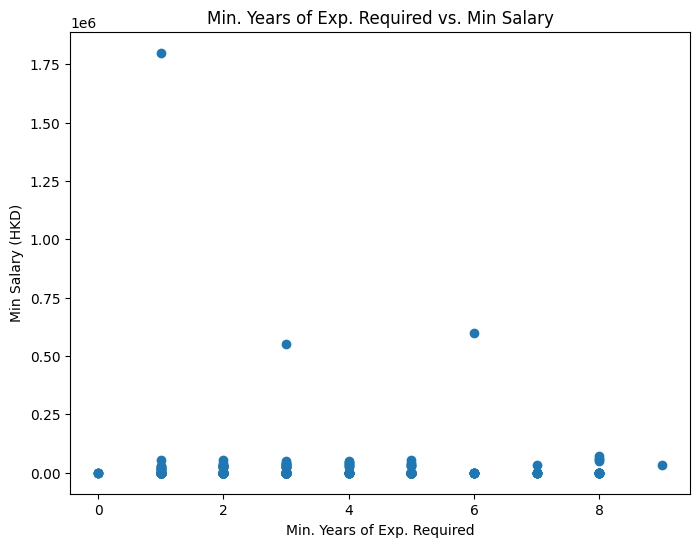

In [151]:
plt.scatter(x=df_cleanse["Min. Years of Exp. Required"], y=df_cleanse["Min_Salary"])
plt.title("Min. Years of Exp. Required vs. Min Salary")
plt.xlabel("Min. Years of Exp. Required")
plt.ylabel("Min Salary (HKD)")
plt.show()

<Axes: xlabel='Min. Years of Exp. Required', ylabel='Min_Salary'>

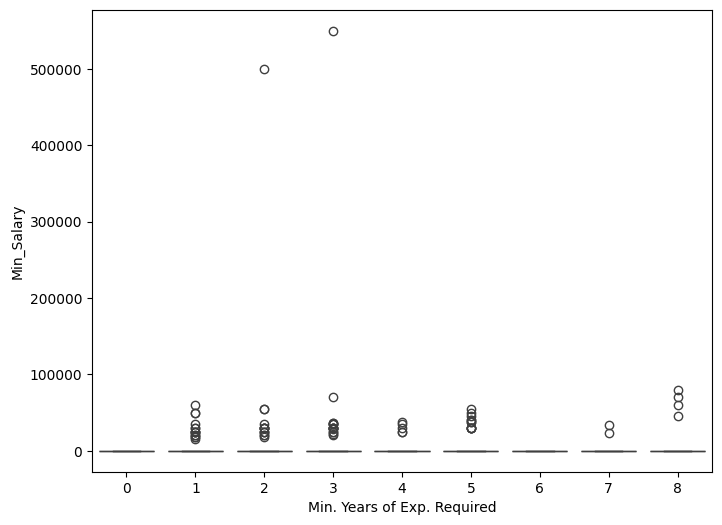

In [190]:
sns.boxplot(x=df_cleanse["Min. Years of Exp. Required"], y=df_cleanse["Min_Salary"])

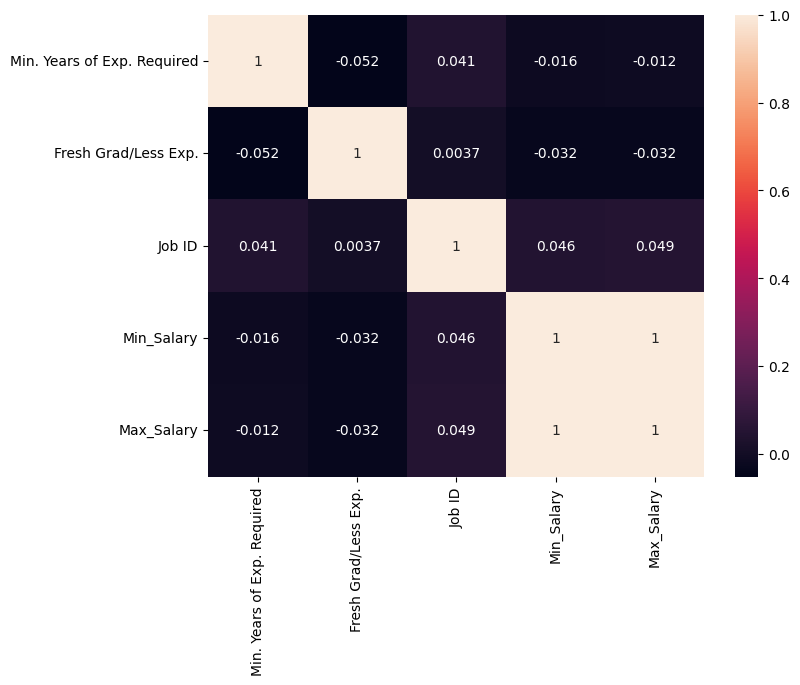

In [152]:
corr_matrix = df_cleanse.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True)
plt.show()


In [153]:
df_numerized = copy.deepcopy(df_cleanse)

for col in df_numerized.columns:
    if(df_numerized[col].dtype == "object"):
        df_numerized[col] = df_numerized[col].astype("category")
        df_numerized[col] = df_numerized[col].cat.codes

df_numerized.head()

,Title,Company,Min. Years of Exp. Required,Fresh Grad/Less Exp.,Classification,Posted Date,Job ID,URL,Exaction Location,District,Area,Min_Salary,Max_Salary
0,184,197,3,False,13,27,76859731,58,27,1,0,0,0
1,237,373,<NA>,True,13,27,77322695,564,14,6,1,15000,19000
2,331,328,3,False,16,35,77347917,608,37,16,1,25000,35000
3,192,216,2,False,13,29,77333789,570,3,14,0,0,0
4,132,104,2,False,13,27,74055325,0,19,6,1,0,0


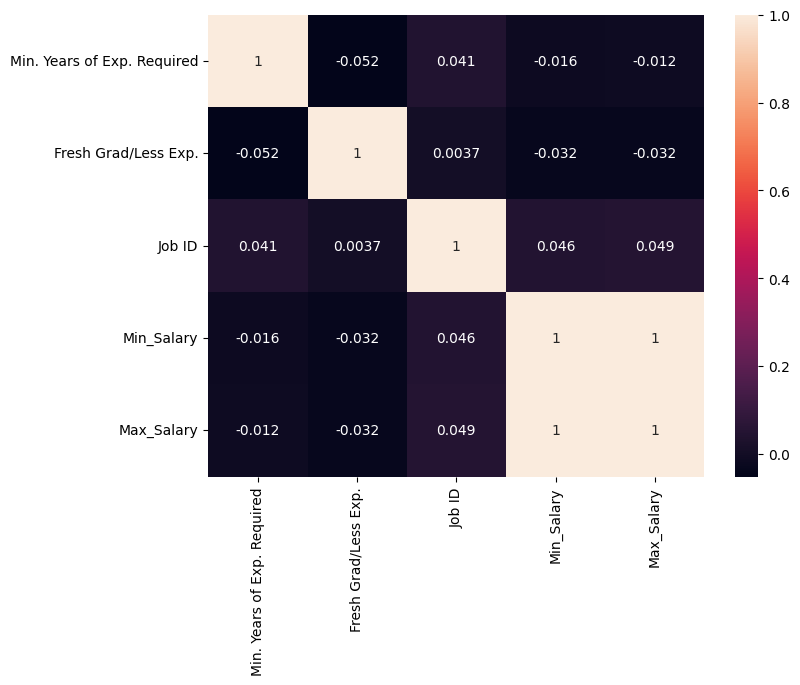

In [154]:
corr_matrix = df_cleanse.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True)
plt.show()


In [155]:
# (Optional) Export the cleansed data to a csv
Path(OUTPUT_PATH).mkdir(parents=True, exist_ok=True)
df_cleanse.to_csv(f"{OUTPUT_PATH}{csv_file}_transformed.csv", index=False)
print("saved")

saved
